In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-market-dataset/symbols_valid_meta.csv
/kaggle/input/stock-market-dataset/stocks/MTL.csv
/kaggle/input/stock-market-dataset/stocks/JOE.csv
/kaggle/input/stock-market-dataset/stocks/DRE.csv
/kaggle/input/stock-market-dataset/stocks/CTY.csv
/kaggle/input/stock-market-dataset/stocks/AMSF.csv
/kaggle/input/stock-market-dataset/stocks/IMH.csv
/kaggle/input/stock-market-dataset/stocks/GFL.csv
/kaggle/input/stock-market-dataset/stocks/CLM.csv
/kaggle/input/stock-market-dataset/stocks/UBER.csv
/kaggle/input/stock-market-dataset/stocks/NEBU.csv
/kaggle/input/stock-market-dataset/stocks/SGB.csv
/kaggle/input/stock-market-dataset/stocks/WWW.csv
/kaggle/input/stock-market-dataset/stocks/UTSI.csv
/kaggle/input/stock-market-dataset/stocks/PBB.csv
/kaggle/input/stock-market-dataset/stocks/UFCS.csv
/kaggle/input/stock-market-dataset/stocks/ZM.csv
/kaggle/input/stock-market-dataset/stocks/DCPH.csv
/kaggle/input/stock-market-dataset/stocks/HALL.csv
/kaggle/input/stock-market-dataset/s

In [2]:
import os
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import plotly.express as plx
from sklearn.metrics import classification_report
import keras
from keras.layers import Embedding,Dense,LSTM,Bidirectional,GlobalMaxPooling1D,Input,Dropout
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.models import Sequential
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
#from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read data

train_data = pd.read_csv("/kaggle/input/stock-market-dataset/stocks/ABM.csv")

In [4]:
#view first 5 rows train data
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.000000,0.950000,0.933333,0.933333,0.027191,18400
1,1980-03-18,0.000000,0.933333,0.908333,0.916667,0.026705,32800
2,1980-03-19,0.916667,0.916667,0.916667,0.916667,0.026705,0
3,1980-03-20,0.000000,0.933333,0.925000,0.933333,0.027191,29600
4,1980-03-21,0.000000,0.933333,0.933333,0.933333,0.027191,9600


In [5]:
# check number of rows and columns of train data

train_data.shape

(10098, 7)

In [6]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,10098.000000,10098.000000,10098.000000,10098.000000,10098.000000,1.009800e+04
mean,14.313921,14.669030,14.341660,14.513697,10.985548,1.585170e+05
std,11.650365,11.557603,11.307207,11.438003,11.327190,2.226926e+05
min,0.000000,0.866667,0.866667,0.866667,0.025249,0.000000e+00
25%,4.000000,4.031250,4.000000,4.000000,0.774204,2.840000e+04
50%,14.187500,14.437500,14.000000,14.250000,8.463741,9.150000e+04
75%,21.309999,21.637499,20.957500,21.340000,17.016195,2.100000e+05
max,44.990002,45.119999,44.669998,44.790001,42.279625,4.552500e+06


In [7]:
# to get infomation about the  train data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10098 entries, 0 to 10097
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10098 non-null  object 
 1   Open       10098 non-null  float64
 2   High       10098 non-null  float64
 3   Low        10098 non-null  float64
 4   Close      10098 non-null  float64
 5   Adj Close  10098 non-null  float64
 6   Volume     10098 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 552.4+ KB


# preprocessing

In [8]:
# checking missing values
train_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
## Check for Duplicates and Remove 
train_data.duplicated().sum() 
train_data.drop_duplicates(inplace = True)  

# Data Visualization

In [10]:
train_data['Open'].value_counts()

Open
0.000000     1080
2.500000       52
4.500000       50
2.425000       48
4.468750       44
             ... 
24.070000       1
24.059999       1
24.240000       1
24.340000       1
24.360001       1
Name: count, Length: 2779, dtype: int64

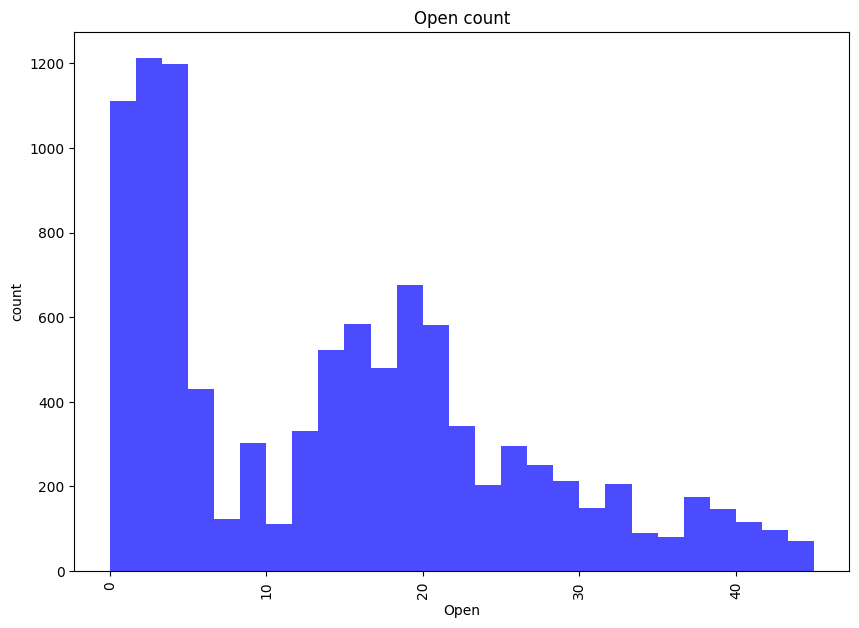

In [11]:
# Create a histogram of is_fraud
plt.figure(figsize=(10, 7))
plt.hist(train_data["Open"],bins =27 , color='blue', alpha=0.7)
plt.title("Open count")
plt.xlabel("Open")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()

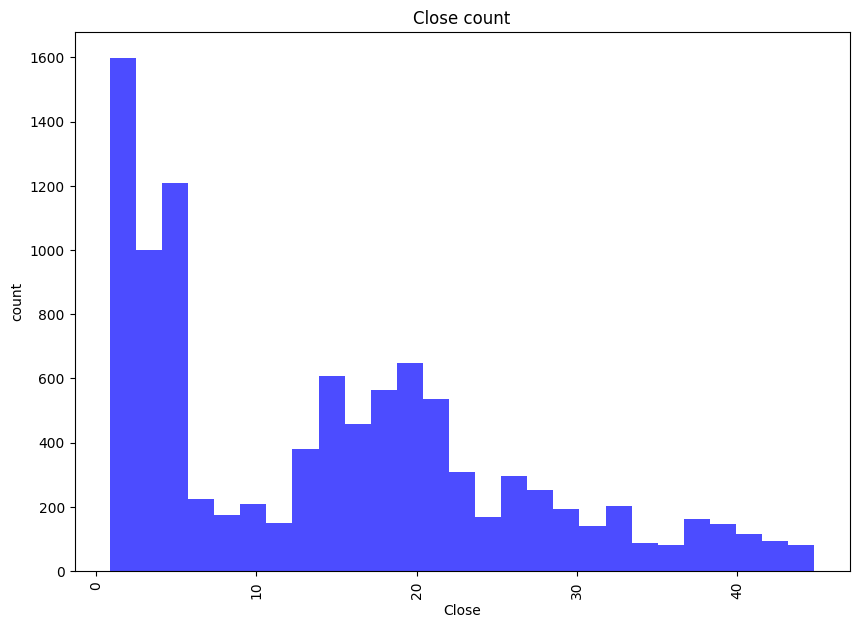

In [12]:
# Create a histogram of is_fraud
plt.figure(figsize=(10, 7))
plt.hist(train_data["Close"],bins =27 , color='blue', alpha=0.7)
plt.title("Close count")
plt.xlabel("Close")
plt.ylabel("count")
plt.xticks(rotation=90)
plt.show()

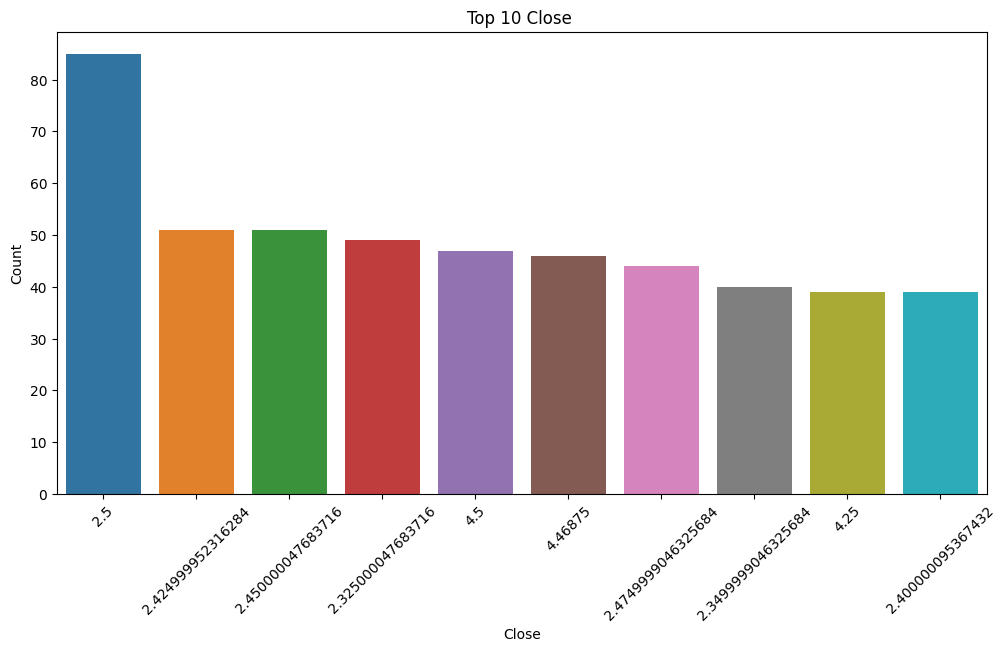

In [13]:
# Count plot of 'zip' with the top 10 ZIP codes
top_closes = train_data['Close'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.countplot(x='Close', data=train_data[train_data['Close'].isin(top_closes)], order=top_closes)
plt.title('Top 10 Close ')
plt.xlabel('Close')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [14]:
X = train_data.drop(['Close'], axis=1)
y = train_data['Close']

In [15]:
from sklearn.preprocessing import MinMaxScaler
# Normalize the data
scaler = MinMaxScaler()
train_data['Close'] = scaler.fit_transform(train_data[['Close']])

In [16]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10  # Adjust this based on your preference
X, y = create_sequences(train_data['Close'], sequence_length)

# Spliting training and test data

In [17]:
x_train ,x_test ,y_train ,y_test = train_test_split(X ,y ,test_size = 0.3, random_state=42)

In [18]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 10, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 96)            74112     
                                                                 
 dropout_1 (Dropout)         (None, 10, 96)            0         
                                                                 
 lstm_2 (LSTM)               (None, 10, 96)            74112     
                                                                 
 dropout_2 (Dropout)         (None, 10, 96)            0         
                                                                 
 lstm_3 (LSTM)               (None, 96)                7

In [20]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),
            epochs=30,batch_size=256)


Epoch 1/30
28/28 [==============================] - 13s 198ms/step - loss: 0.0349 - val_loss: 0.0052
Epoch 2/30
28/28 [==============================] - 4s 143ms/step - loss: 0.0024 - val_loss: 3.2992e-04
Epoch 3/30
28/28 [==============================] - 4s 144ms/step - loss: 0.0014 - val_loss: 3.4890e-04
Epoch 4/30
28/28 [==============================] - 4s 148ms/step - loss: 0.0013 - val_loss: 3.4563e-04
Epoch 5/30
28/28 [==============================] - 4s 141ms/step - loss: 0.0012 - val_loss: 3.1520e-04
Epoch 6/30
28/28 [==============================] - 4s 140ms/step - loss: 0.0012 - val_loss: 3.1705e-04
Epoch 7/30
28/28 [==============================] - 4s 136ms/step - loss: 0.0012 - val_loss: 3.1285e-04
Epoch 8/30
28/28 [==============================] - 4s 137ms/step - loss: 0.0012 - val_loss: 3.1281e-04
Epoch 9/30
28/28 [==============================] - 4s 140ms/step - loss: 0.0011 - val_loss: 3.4265e-04
Epoch 10/30
28/28 [==============================] - 4s 141ms/step 

In [22]:
loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")

# Make predictions
predictions = model.predict(x_test)

# Inverse transform the predictions to get the actual stock prices
predictions = scaler.inverse_transform(predictions)

95/95 [==============================] - 1s 12ms/step - loss: 4.0164e-04
Test Loss: 0.00040164031088352203
95/95 [==============================] - 3s 13ms/step


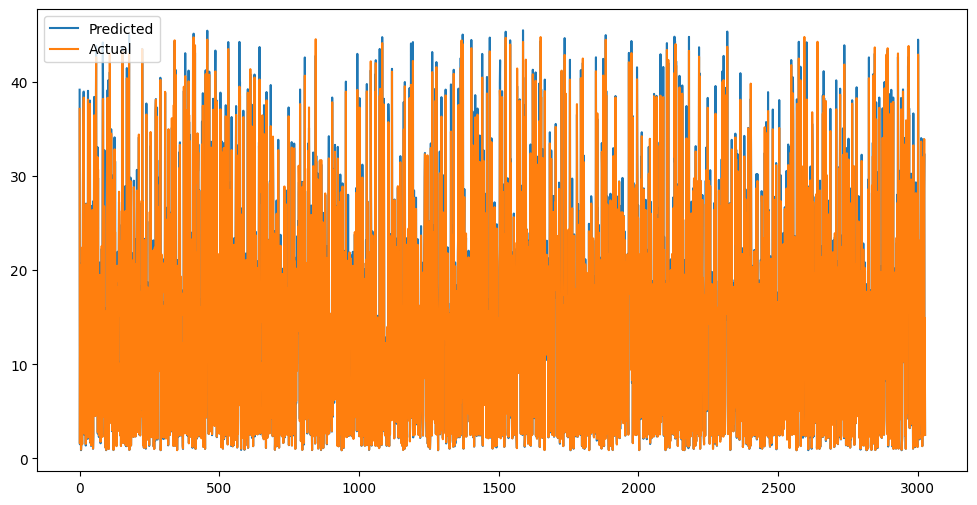

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Predicted')
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.legend()
plt.show()

loss at epoch 1: 0.03492642939090729
loss at epoch 50: 0.0010650537442415953


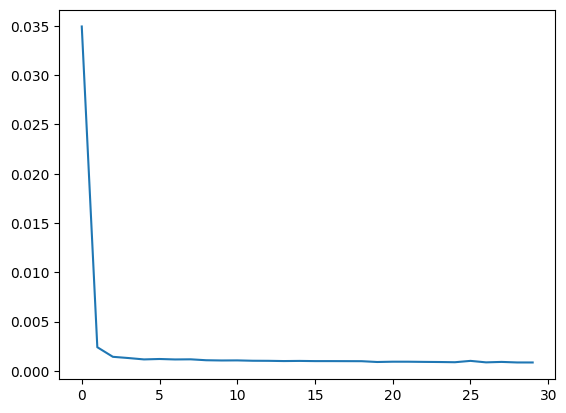

In [24]:
print(f"loss at epoch 1: {history.history['loss'][0]}")
print(f"loss at epoch 50: {history.history['loss'][9]}")
plt.plot(history.history['loss'])